### Goal: To predict the values of air pollution measurements over time

In [1]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# System module
import os

# Set the plotting context parameters
sns.set_context('notebook')

## Acuqire the Training Data

In [2]:
# Read the train.csv
df = pd.read_csv("train.csv")

# Print the descriptive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [3]:
# Print the first 5 rows as a sample
df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


**Takeaways**
- The dataset contains 12 columns: 9 of them are features and 3 of them are target variables.
- The features are datetime, temperature in celsius, relative and absolute humidity and the readings from  5 sensors.
- Besides datetime, all the features are numeric.
- Three target values need to be predicted: carbon monoxide, benzene, and nitrogen oxides.

In [4]:
# Any missing values?
df.isnull().sum(axis=0)

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [5]:
# Any duplicates?
df.duplicated().sum()

0

**Takeaways**
- No missing values and duplicates exist.

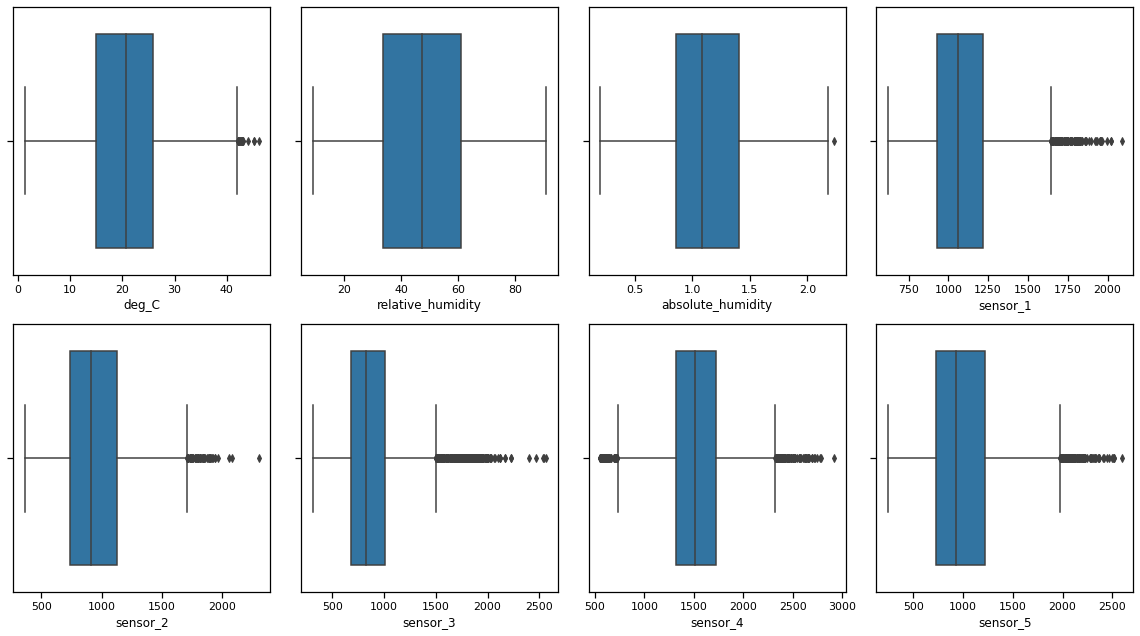

In [6]:
# Plot the distribution of the features

features = ['deg_C', 'relative_humidity', 'absolute_humidity',
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

fig, axes = plt.subplots(2,4, figsize=(16,9))

axes = axes.ravel()

for i, feature in zip(range(8), features):
#     df[feature].hist(ax=axes[i])
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()

**Takeaways**
- All the sensor readings contains outliers beyond the maximum.
- Only sensor 4 has outliers beyond minimum.
- **<i>How to deal with the outliers?</i>**

In [36]:
# Print the descriptive statistics of the numeric features
df.describe()

,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides,day,month,year
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784,16.144705,7.647166,2010.000141
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723,8.758778,2.802293,0.011859
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000,1.000000,1.000000,2010.000000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000,9.000000,5.000000,2010.000000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000,16.000000,8.000000,2010.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000,24.000000,10.000000,2010.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000,31.000000,12.000000,2011.000000


**Takeaways**
- The temperature are all above 0 and ranges from 1.3 to 46.1 degrees.
- The absolute humidity is the total mass of water vapor present in a given volume of air.
- The relative humidity is defined as the ratio of the partial pressure of water vapor in the mixture to the equilibrium vapor pressure of water over a flat surface of pure water at a given temperature.
- The unit of the target variable is not specified. The numbers is supposed to represent the concentration of the toxic gas in the air and the unit is usually ppm. 

## Prepare the Training Data

In [7]:
# Rename the columns using a mapper

col_names = {'date_time': 'datetime',
             'deg_C': 'temp',
             'target_carbon_monoxide': 'carbon_monoxide',
             'target_benzene': 'benzene',
             'target_nitrogen_oxides': 'nitrogen_oxides'}


df = df.rename(columns=col_names)
df.head()

,datetime,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [8]:
# Convert the datetime to the correct format
df.datetime = pd.to_datetime(df.datetime)
df.dtypes

datetime             datetime64[ns]
temp                        float64
relative_humidity           float64
absolute_humidity           float64
sensor_1                    float64
sensor_2                    float64
sensor_3                    float64
sensor_4                    float64
sensor_5                    float64
carbon_monoxide             float64
benzene                     float64
nitrogen_oxides             float64
dtype: object

In [9]:
# Split the timestamp to separate date and time

df = df.assign(date = [dt.date() for dt in df.datetime],
               time = [dt.time() for dt in df.datetime])
df.head()

,datetime,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides,date,time
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010-03-10,18:00:00
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010-03-10,19:00:00
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010-03-10,20:00:00
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010-03-10,21:00:00
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010-03-10,22:00:00


In [10]:
# Split the date into day, monty, and year

df = df.assign(day = [d.day for d in df.date],
               month = [d.month for d in df.date],
               year = [d.year for d in df.date])

df.head()

,datetime,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides,date,time,day,month,year
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010-03-10,18:00:00,10,3,2010
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010-03-10,19:00:00,10,3,2010
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010-03-10,20:00:00,10,3,2010
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010-03-10,21:00:00,10,3,2010
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010-03-10,22:00:00,10,3,2010


In [11]:
# Set the date_time as the index

df = df.set_index('datetime')
df.head()

,temp,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,carbon_monoxide,benzene,nitrogen_oxides,date,time,day,month,year
datetime,,,,,,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010-03-10,18:00:00,10,3,2010
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010-03-10,19:00:00,10,3,2010
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010-03-10,20:00:00,10,3,2010
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010-03-10,21:00:00,10,3,2010
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010-03-10,22:00:00,10,3,2010


## Exploration and Hypothesis Testing

### How is the aboslute humidity related to relative humidity?

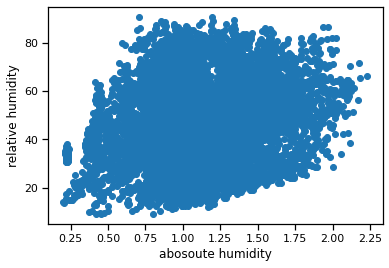

In [12]:
plt.scatter('absolute_humidity', 'relative_humidity', data=df)
plt.xlabel('abosoute humidity')
plt.ylabel('relative humidity')
plt.show()

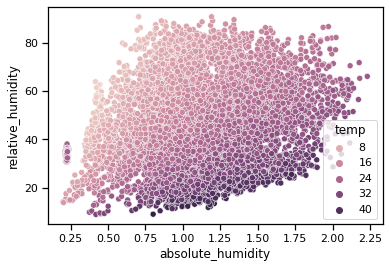

In [14]:
sns.scatterplot(data=df, x='absolute_humidity', y='relative_humidity', hue='temp')
plt.show()

**Takeaways**
- No obvious relationship has been found between aboslute and relative humidity.

### How is the temperature related with humidity?

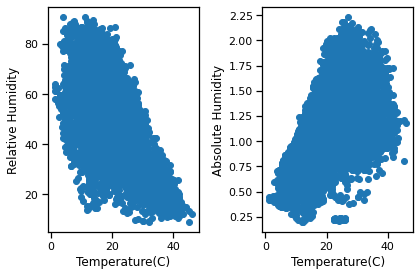

In [15]:
plt.subplot(121)
plt.scatter('temp', 'relative_humidity', data=df)
plt.xlabel('Temperature(C)')
plt.ylabel('Relative Humidity')

plt.subplot(122)
plt.scatter('temp','absolute_humidity', data=df)
plt.xlabel('Temperature(C)')
plt.ylabel('Absolute Humidity')

plt.tight_layout()
plt.show()

**Takeaways**
- Generally speaking, when the temperature goes up, the relative humidity goes down while the absolute humidity goes up. 

### Does one sensor detect more than one toxic chemicals?
- My assumption is that sensors can detect mulitple toxic gases but have different accuracies.
- The data visualizations below proves my assumption.

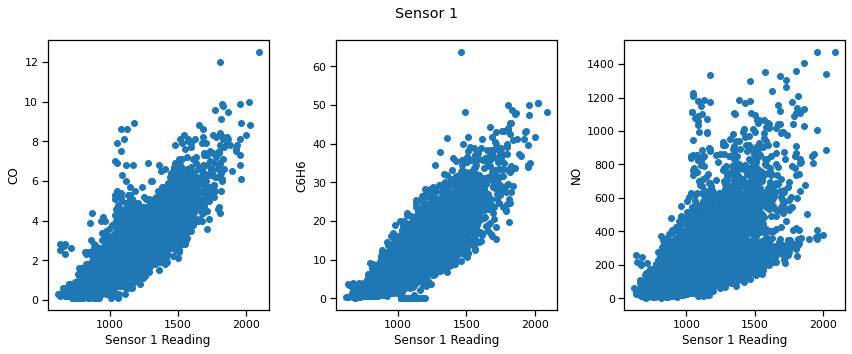

In [24]:
# Plot the concentrations of the toxic chemicals over the readings of sensor 1

plt.figure(figsize=(12,5))
plt.suptitle('Sensor 1')

plt.subplot(131)
plt.scatter('sensor_1', 'carbon_monoxide', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('CO')

plt.subplot(132)
plt.scatter('sensor_1', 'benzene', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_1', 'nitrogen_oxides', data=df)
plt.xlabel('Sensor 1 Reading')
plt.ylabel('NO')

plt.tight_layout()
plt.show()

**Takeaways**
- Generally speaking, as the readings in sensor 1 increases, the amount of all three chemcials in the air increase. 
- The data points in the sensor_1-NO graph are more scattered especially when the readings are above 1000.  

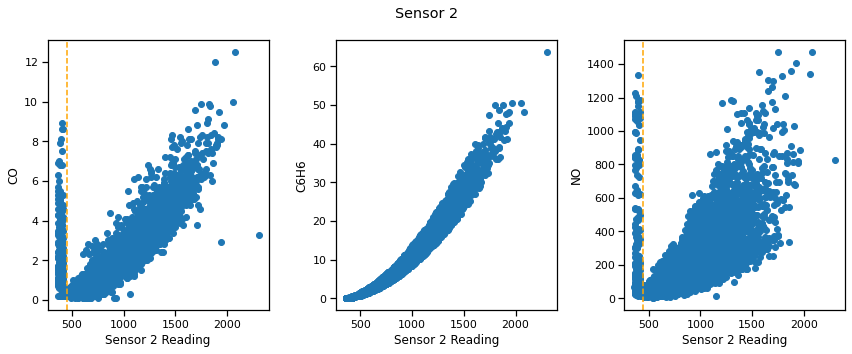

In [39]:
# Plot the concentrations of the toxic chemicals over the readings of sensor 2

plt.figure(figsize=(12,5))
plt.suptitle('Sensor 2')

plt.subplot(131)
plt.scatter('sensor_2', 'carbon_monoxide', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('CO')
plt.axvline(x=450, linestyle='--', c='orange')

plt.subplot(132)
plt.scatter('sensor_2', 'benzene', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_2', 'nitrogen_oxides', data=df)
plt.xlabel('Sensor 2 Reading')
plt.ylabel('NO')
plt.axvline(x=450, linestyle='--', c='orange')

plt.tight_layout()
plt.show()

**Takeaways**
- When the reading of sensor 2 is below 450, the concentration of CO and NO is unrelated with the sensor_2 readings. 
- The sensor_2 readings shows a linear relationship with the concentration of benzene. 

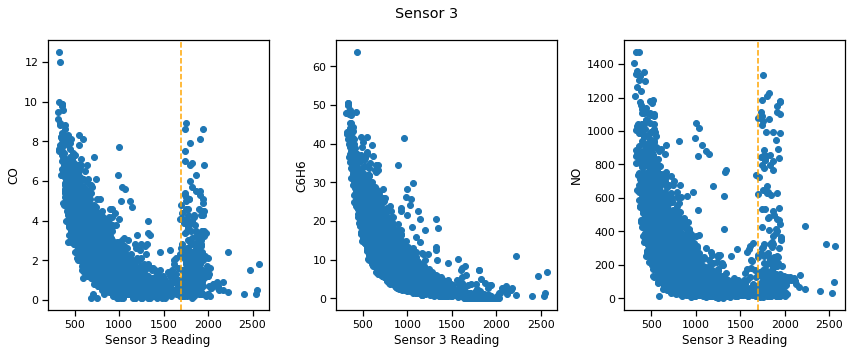

In [41]:
# Plot the concentrations of the toxic chemicals over the readings of sensor 3

plt.figure(figsize=(12,5))
plt.suptitle('Sensor 3')

plt.subplot(131)
plt.scatter('sensor_3', 'carbon_monoxide', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('CO')
plt.axvline(x=1700, linestyle='--', c='orange')

plt.subplot(132)
plt.scatter('sensor_3', 'benzene', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_3', 'nitrogen_oxides', data=df)
plt.xlabel('Sensor 3 Reading')
plt.ylabel('NO')
plt.axvline(x=1700, linestyle='--', c='orange')

plt.tight_layout()
plt.show()

**Takeaways**
- When the readings of sensor 3 is above 1700, the concentration of CO and NO is unrelated with the sensor readings.
- Sensor 3 is the only sensor of which the readings shows a inverse relatioship with the concentration of the chemicals.  

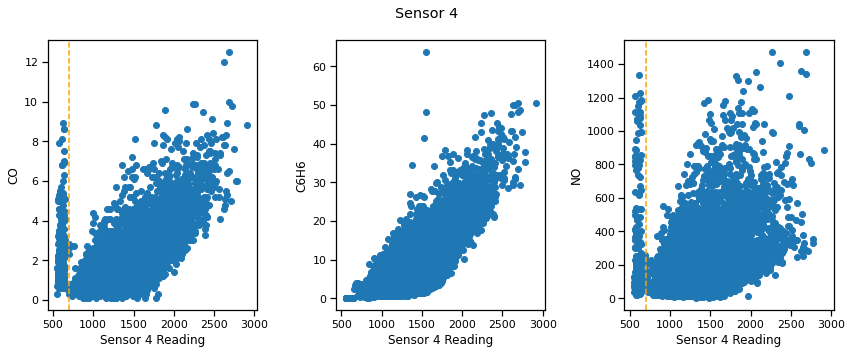

In [44]:
# Plot the concentrations of the toxic chemicals over the readings of sensor 4

plt.figure(figsize=(12,5))
plt.suptitle('Sensor 4')

plt.subplot(131)
plt.scatter('sensor_4', 'carbon_monoxide', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('CO')
plt.axvline(x=700, linestyle='--', c='orange')

plt.subplot(132)
plt.scatter('sensor_4', 'benzene', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_4', 'nitrogen_oxides', data=df)
plt.xlabel('Sensor 4 Reading')
plt.ylabel('NO')
plt.axvline(x=700, linestyle='--', c='orange')

plt.tight_layout()
plt.show()

**Takeaways**
- Similar to sensor 3, the readings of the sensor 4 show no relationship with the concentration of CO and NO when the readings in the low end. 

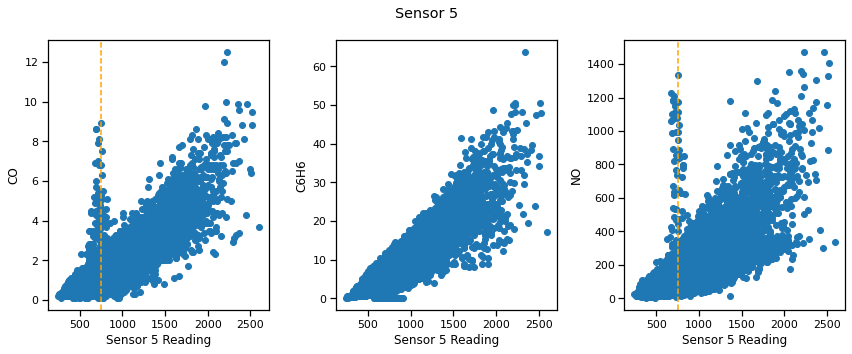

In [48]:
# Plot the concentrations of the toxic chemicals over the readings of sensor 5

plt.figure(figsize=(12,5))
plt.suptitle('Sensor 5')

plt.subplot(131)
plt.scatter('sensor_5', 'carbon_monoxide', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('CO')
plt.axvline(x=750, linestyle='--', c='orange')

plt.subplot(132)
plt.scatter('sensor_5', 'benzene', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('C6H6')

plt.subplot(133)
plt.scatter('sensor_5', 'nitrogen_oxides', data=df)
plt.xlabel('Sensor 5 Reading')
plt.ylabel('NO')
plt.axvline(x=750, linestyle='--', c='orange')

plt.tight_layout()
plt.show()

**Takeaways**
- <strong>All the sensors can detect all three toxci gases at the same time. They perform best on benzene, a nonpolar organic molecule.</strong>
- Sensor 3 has a reverse relatioship with the concentration of the toxic gases while other sensors have a direct relationship with the concentration of the toxic gases.
- Except sensor 1, other sensors become unrelated with the concentration of CO and NO when the readings are around 750.
- Sensor 2 show a nealry perfect linear relationship with the concentration of benzene.

### Under what conditions do the Sensors Become Ineffective?

#### Sensor 2

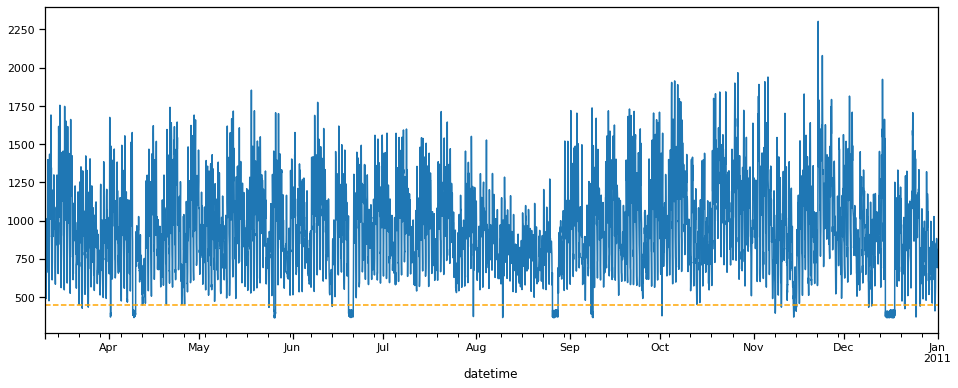

In [50]:
# Plot the readings of sensor 2 over time

df.sensor_2.plot(figsize=(16,6))
plt.axhline(y=450, linestyle='--', c='orange')
plt.show()

In [84]:
# Compute what months the sensor 2 become ineffective

mask = df.sensor_2 < 450
df_sensor2_less_450 = df[mask]

print(df_sensor2_less_450.shape[0])
df_sensor2_less_450.month.value_counts()

257


12    90
8     49
6     40
4     28
9     18
5     15
11    13
3      2
7      1
10     1
Name: month, dtype: int64

#### Sensor 3

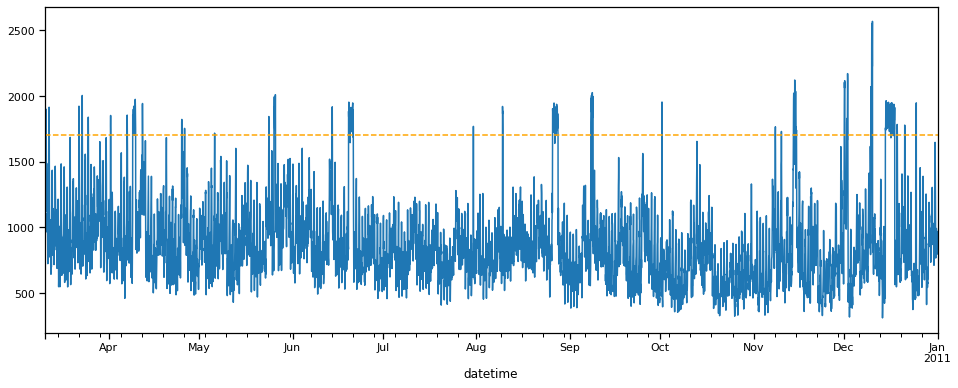

In [54]:
# Plot the readings of sensor 3 over time

df.sensor_3.plot(figsize=(16,6))
plt.axhline(y=1700, linestyle='--', c='orange')
plt.show()

In [85]:
# Compute what months the sensor 3 become ineffective

mask = df.sensor_3 > 1700
df_sensor3_more_1700 = df[mask]

print(df_sensor3_more_1700.shape[0])
df_sensor3_more_1700.month.value_counts()

290


12    104
8      45
6      39
4      34
5      19
9      18
11     16
3      13
7       1
10      1
Name: month, dtype: int64

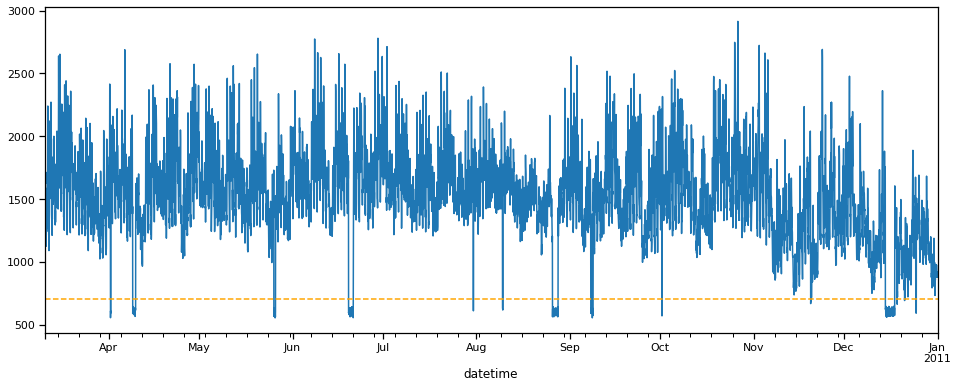

In [56]:
# Plot the readings of sensor 4 over time

df.sensor_4.plot(figsize=(16,6))
plt.axhline(y=700, linestyle='--', c='orange')
plt.show()

In [86]:
# Compute what months the sensor 4 become ineffective

mask = df.sensor_4 < 700
df_sensor4_less_700 = df[mask]

print(df_sensor4_less_700.shape[0])
df_sensor4_less_700.month.value_counts()

233


12    82
8     49
6     38
4     27
9     18
5     14
11     3
7      1
10     1
Name: month, dtype: int64

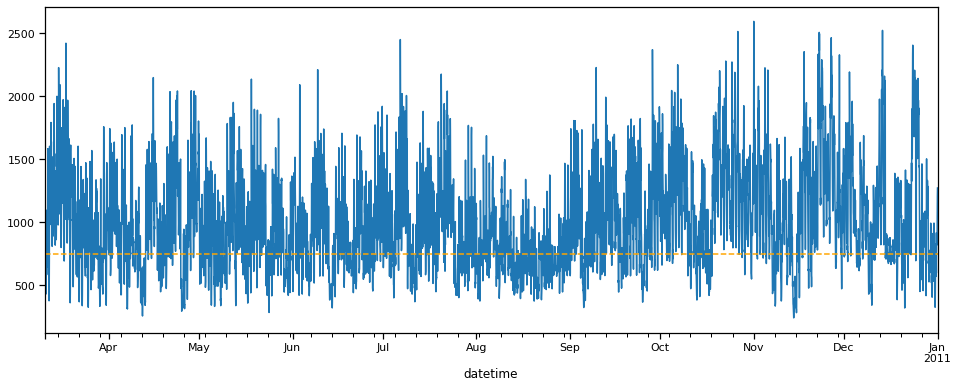

In [57]:
# Plot the readings of sensor 5 over time

df.sensor_5.plot(figsize=(16,6))
plt.axhline(y=750, linestyle='--', c='orange')
plt.show()

### When is the Data Collected? 

In [38]:
# Find out the date time range when the data points are collected

start = df.index[0]
end = df.index[-1]

print(f"The data points are collected from {start} to {end}")

The data points are collected from 2010-03-10 18:00:00 to 2011-01-01 00:00:00


In [30]:
# What time during the day is the data collected?
df.time.value_counts().sort_index()

00:00:00    297
01:00:00    296
02:00:00    296
03:00:00    296
04:00:00    296
05:00:00    296
06:00:00    296
07:00:00    296
08:00:00    296
09:00:00    296
10:00:00    296
11:00:00    296
12:00:00    296
13:00:00    296
14:00:00    296
15:00:00    296
16:00:00    296
17:00:00    296
18:00:00    297
19:00:00    297
20:00:00    297
21:00:00    297
22:00:00    297
23:00:00    297
Name: time, dtype: int64

**Takeaways**
- The data has been collected from 6 pm March 10, 2010 to the end of the year. 
- In one day, the data is collected every hour on the hour.

### Does the Concentration of the Toxci Gas Change during the Day?

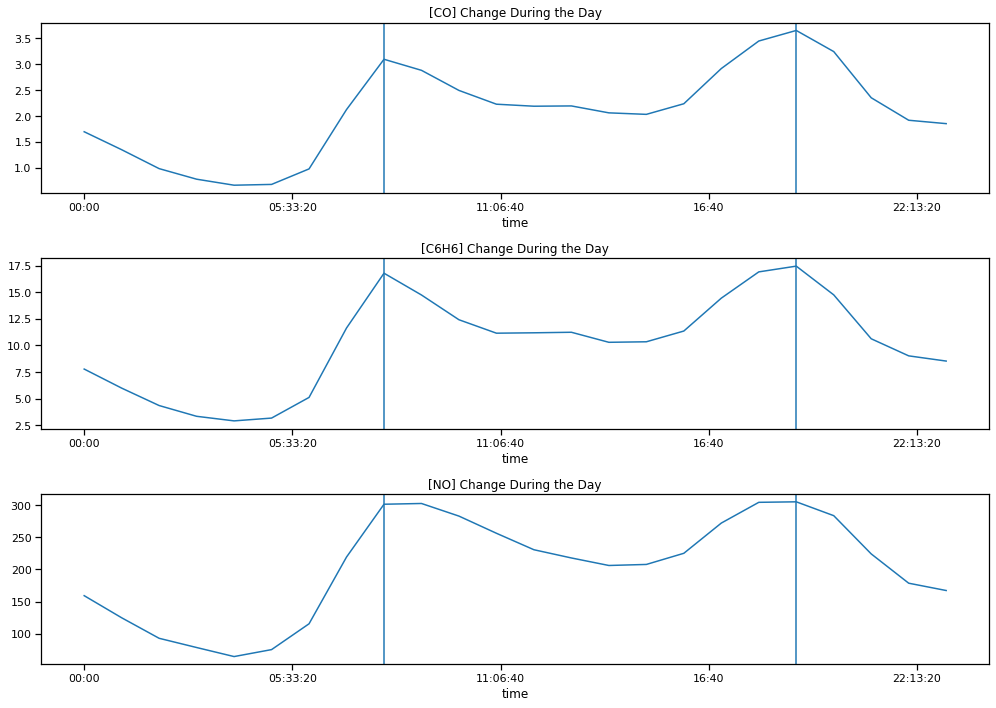

In [83]:
plt.figure(figsize=(14,10))

plt.subplot(311)
df.groupby('time').carbon_monoxide.mean().plot()
plt.title('[CO] Change During the Day')
plt.axvline(x="8:00:00")
plt.axvline(x="19:00:00")


plt.subplot(312)
df.groupby('time').benzene.mean().plot()
plt.title('[C6H6] Change During the Day')
plt.axvline(x="8:00:00")
plt.axvline(x="19:00:00")

plt.subplot(313)
df.groupby('time').nitrogen_oxides.mean().plot()
plt.title('[NO] Change During the Day')
plt.axvline(x="8:00:00")
plt.axvline(x="19:00:00")

plt.tight_layout()
plt.show()

**Takeaways**
- The concentrations of the toxic gases fluctuate during the day and all three gases show a very similar "twin-peaks" pattern.
- One peak appears in the morning around 8 am and the other appears in the evening around 7 pm. 
- This pattern may suggest all the toxic gases are generates from the similar source and released at the same time.

### How does the Concentration of the Toxic Gases Change over Time?

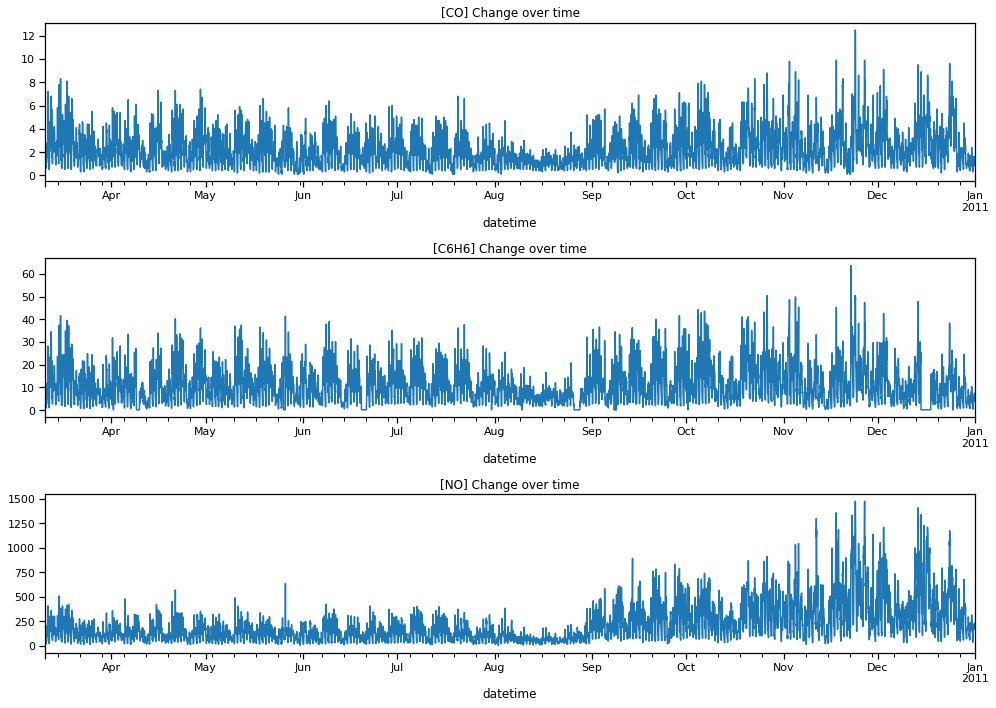

In [85]:
plt.figure(figsize=(14,10))

plt.subplot(311)
df.carbon_monoxide.plot()
plt.title('[CO] Change over time')

plt.subplot(312)
df.benzene.plot()
plt.title('[C6H6] Change over time')

plt.subplot(313)
df.nitrogen_oxides.plot()
plt.title('[NO] Change over time')

plt.tight_layout()
plt.show()

**Takeaways**
- The concentrations of the toxic gases exhibit seasonality over time. 
- They reach the highest in the late November and the lowest in the middle of August.

### How does the concentration of toxic gases change over temperature?

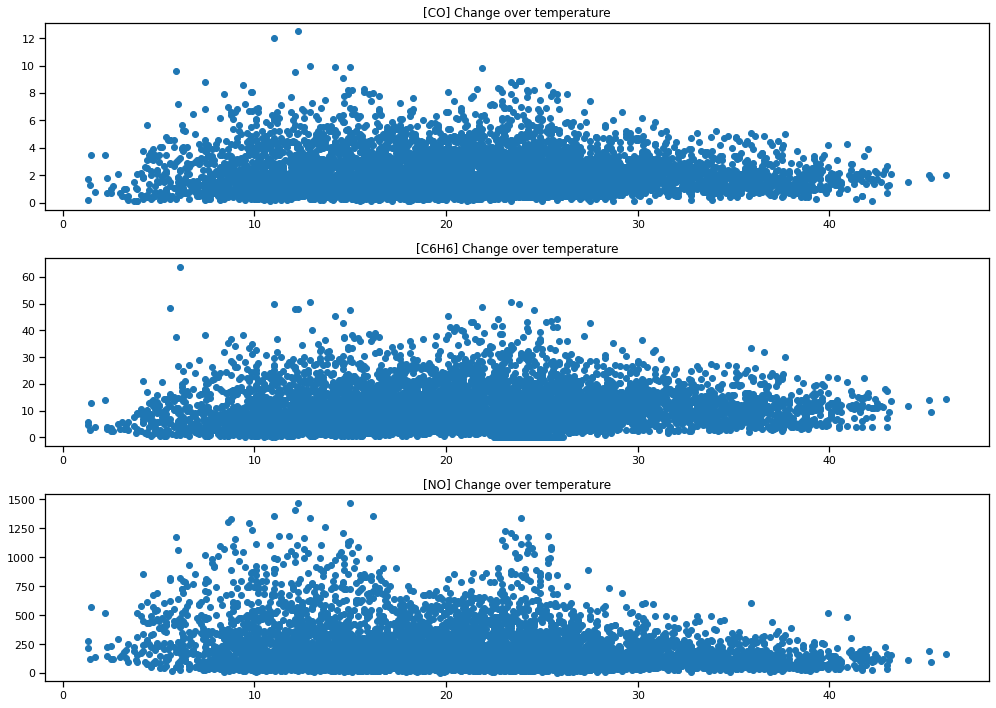

In [91]:
plt.figure(figsize=(14,10))

plt.subplot(311)
plt.scatter('temp', 'carbon_monoxide', data=df)
plt.title('[CO] Change over temperature')

plt.subplot(312)
plt.scatter('temp', 'benzene', data=df)
plt.title('[C6H6] Change over temperature')

plt.subplot(313)
plt.scatter('temp', 'nitrogen_oxides', data=df)
plt.title('[NO] Change over temperature')

plt.tight_layout()
plt.show()

**Takeaways**
- The high concentrations of the toxic gases usually appear when the temperature is below 30 celsius. 

### Inspect the Test Dataset

In [16]:
# Load the test dataset

test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB


In [17]:
# Inspect the dataset

test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [18]:
# Inspect the dataset

test.tail()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5
2246,2011-04-04 14:00:00,27.9,13.5,0.5028,1124.6,1078.4,608.2,1061.3,816.0


**Takeaways**
- The test dataset is collected from 2011-01-01 0:00 to 2011-04-04-14:00. 